In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import squarify
import seaborn as sns


# Part I: Preprocessing

In [64]:
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/kaggle/input/elzihimer/alzheimers_disease_data.csv')
df = df.drop(columns=['DoctorInCharge']) # remove the unrelated data
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# Part II: Data Analysis and Visualization

## Diagnosis distribution

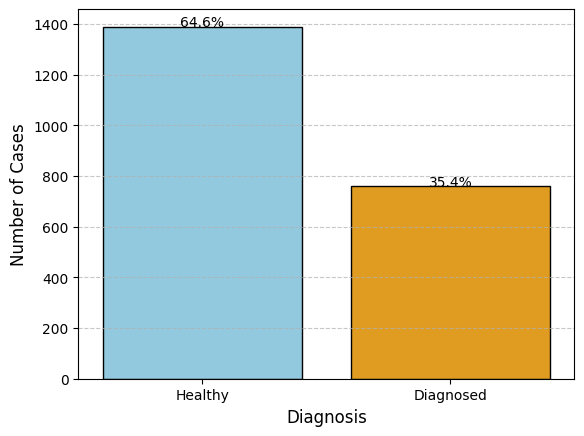

In [66]:
# Calculate the count and percentage for each category
counts = df['Diagnosis'].value_counts()  # Count the number of occurrences for each diagnosis category
percentages = counts / counts.sum() * 100  # Calculate the percentage for each category

# Define labels for the x-axis and the colors for the bars
labels = ['Healthy', 'Diagnosed']  # Labels for the two categories (Diagnosis = 0, 1)
colors = ['skyblue', 'orange']  # Colors for the bars

# Create a bar plot using Seaborn
sns.barplot(x=labels, y=counts.values, palette=colors, edgecolor='black')  # Draw the bar chart with specified colors and edge lines

# Add percentage labels above each bar
for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 1, f'{percentage:.1f}%', ha='center', fontsize=10)  # Add text at the top of each bar showing the percentage

# Beautify the plot with axis labels and a title
plt.xlabel('Diagnosis', fontsize=12)  # Label for the x-axis
plt.ylabel('Number of Cases', fontsize=12)  # Label for the y-axis
#plt.title('Alzheimer Diagnosis Distribution', fontsize=14, fontweight='bold')  # Title of the plot

# Add gridlines for better readability (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines along the y-axis with transparency
plt.savefig('diagnosis.png', format='png')
# Display the plot
plt.show()  # Render and show the chart


## Diagnosis Distribution by Ethnicity

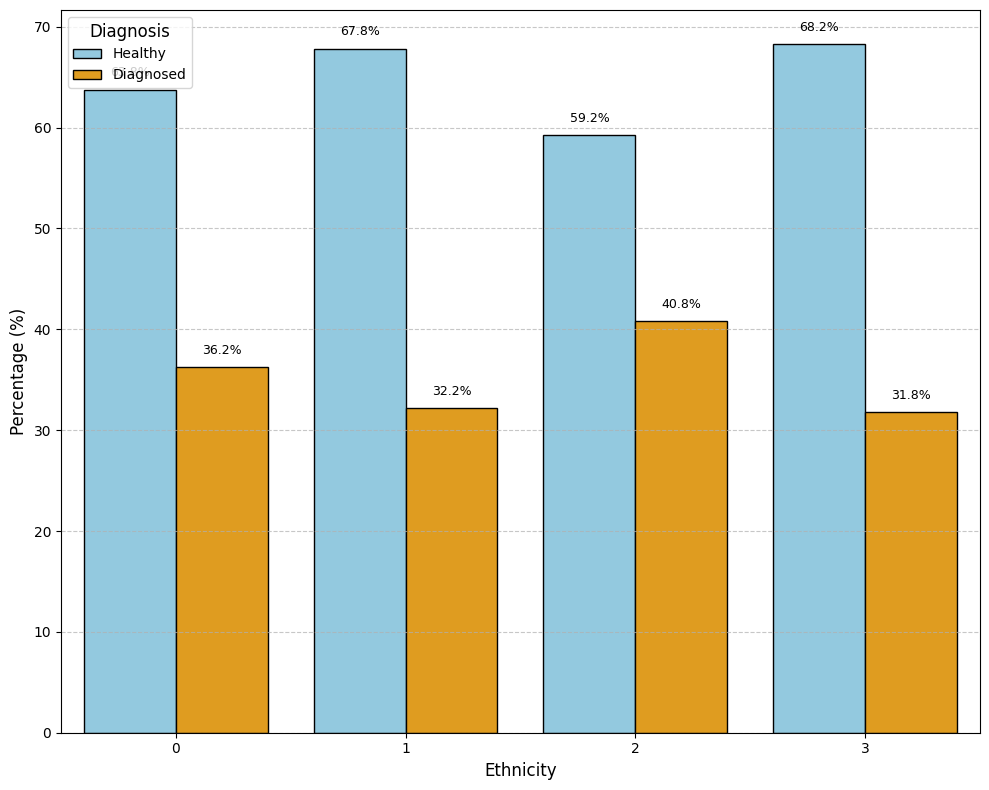

In [67]:
# Group data by Ethnicity and Diagnosis, calculate counts
grouped_data = df.groupby(['Ethnicity', 'Diagnosis']).size().unstack(fill_value=0)

# Convert counts to percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Melt the data for Seaborn compatibility
melted_data = percentage_data.reset_index().melt(id_vars='Ethnicity', var_name='Diagnosis', value_name='Percentage')

# Map diagnosis values to meaningful labels
melted_data['Diagnosis'] = melted_data['Diagnosis'].map({0: 'Healthy', 1: 'Diagnosed'})

# Create a barplot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(
    data=melted_data,
    x='Ethnicity',
    y='Percentage',
    hue='Diagnosis',
    palette=['skyblue', 'orange'],
    edgecolor='black'
)

# Add percentage labels on top of each bar
for i, bar in enumerate(plt.gca().patches):
    percentage = bar.get_height()
    if percentage > 0:  # Avoid adding labels to bars with zero height
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,  # Slightly above the bar
            f'{percentage:.1f}%',  # Format as percentage
            ha='center', va='bottom', fontsize=9
        )

# Beautify the plot
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
#plt.title('Diagnosis Distribution by Ethnicity', fontsize=14, fontweight='bold')
plt.legend(title='Diagnosis', title_fontsize=12, fontsize=10)  # Improve legend formatting
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for readability

plt.tight_layout()  # Avoid overlapping labels
plt.savefig('ethnicity.png', format='png')
plt.show()

##  Diagnosis analysis on Age Range 

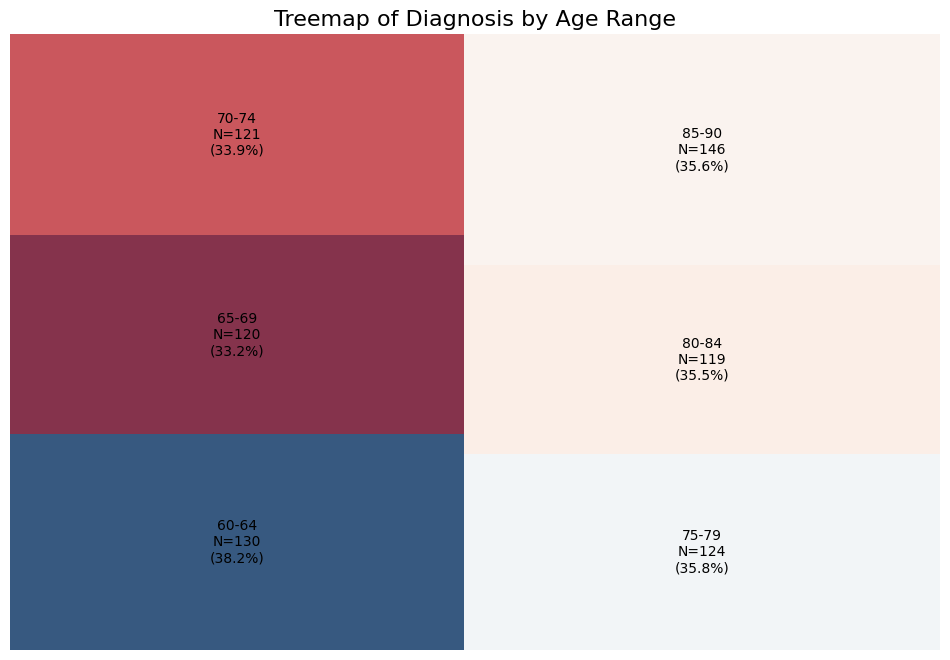

In [68]:
# Define the bins (age intervals) and corresponding labels
bins = [60, 65, 70, 75, 80, 85, 91]  # The boundaries for age intervals
labels = ['60-64', '65-69', '70-74', '75-79', '80-84', '85-90']  # Labels for each interval

# Create a new DataFrame and add a column "AgeRange" based on the defined age intervals
df_agerange = df.copy()
df_agerange['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  
# `right=False` makes the intervals left-closed, right-open

# Group by "AgeRange" and count the total number of patients in each age range
total_counts = df_agerange.groupby('AgeRange')['PatientID'].count().reset_index(name='TotalCount')  
# Rename the column to 'TotalCount'

# Group by both "AgeRange" and "Diagnosis" to count the number of cases for each diagnosis
grouped_data = df_agerange.groupby(['AgeRange', 'Diagnosis']).size().reset_index(name='Count')  
# Rename the count column to 'Count'

# Merge the total patient counts with the grouped data on "AgeRange"
grouped_data = pd.merge(grouped_data, total_counts, on='AgeRange', how='left')

# Exclude rows where Diagnosis is 0 (Only diagnosed patients )
grouped_data = grouped_data[grouped_data['Diagnosis'] != 0]

grouped_data.drop(columns=['Diagnosis'], inplace=True)

# Calculate the percentage of each diagnosis relative to the total patients in the same age range
grouped_data['Percentage'] = (grouped_data['Count'] / grouped_data['TotalCount']) * 100

# Generate labels for each group, including the age range, count, and percentage
grouped_data['Label'] = (grouped_data['AgeRange'].astype(str) + "\n" +  # Add age range
                         "N=" + grouped_data['Count'].astype(str) +     # Add count (N)
                         "\n(" + grouped_data['Percentage'].apply(lambda x: f"{x:.1f}") + "%)")  
                         # Add percentage formatted to 1 decimal place

# Set up color normalization based on percentage values
norm = plt.Normalize(vmin=grouped_data['Percentage'].min(), vmax=grouped_data['Percentage'].max())
cmap = plt.cm.RdBu  # Use a red-to-blue colormap

# Map percentages to colors using the defined colormap
colors = [cmap(norm(value)) for value in grouped_data['Percentage']]

# Prepare the data for the treemap: sizes and labels
sizes = grouped_data['Count']  # The size of each rectangle corresponds to the count of cases
labels = grouped_data['Label']  # The label for each rectangle

# Plot the treemap
plt.figure(figsize=(12, 8)) 
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors) 
plt.title("Treemap of Diagnosis by Age Range", fontsize=16)  
plt.axis('off')  
plt.show() 

## The correlation heatmap of all the features

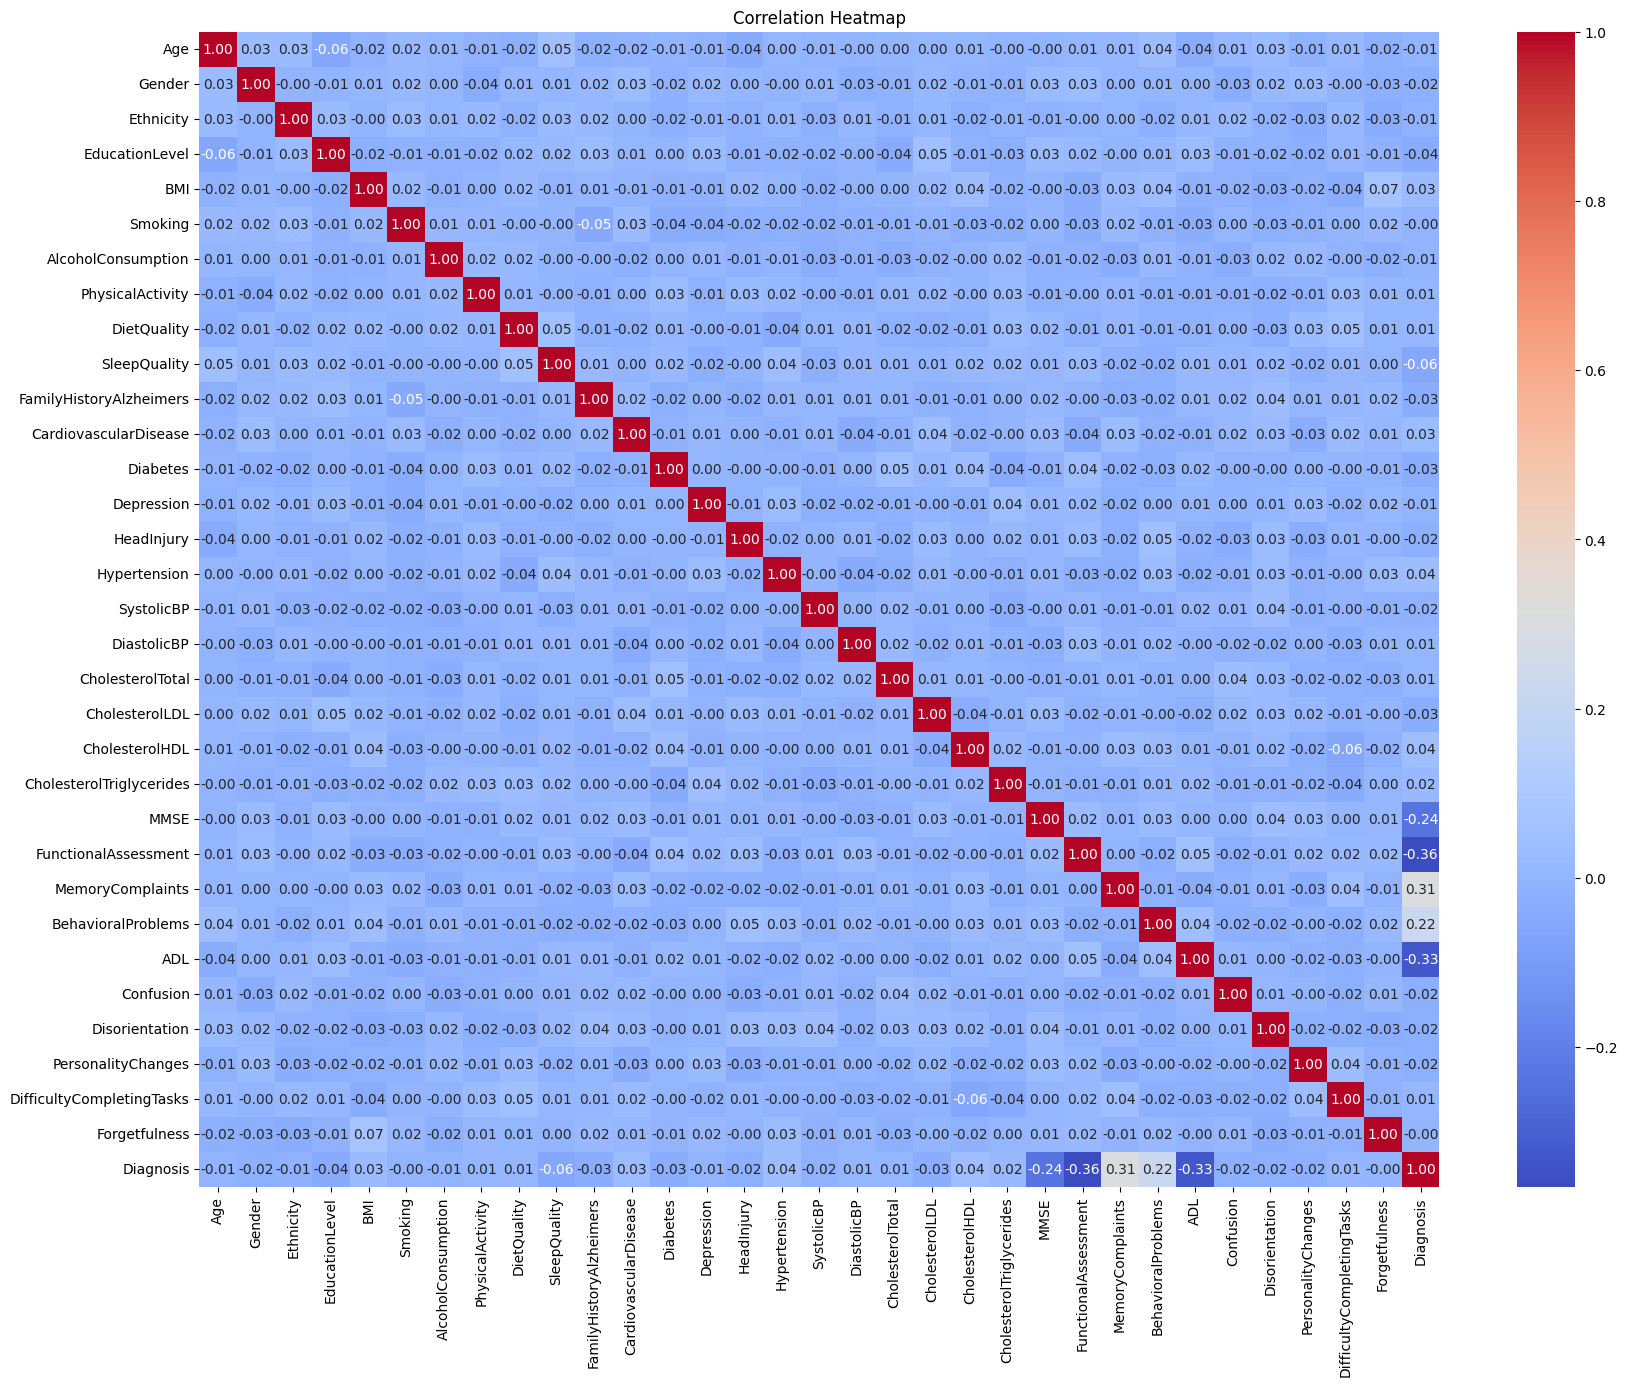

In [69]:
# Plot the correlation heatmap
df_dataonly = df.drop(columns='PatientID')
correlation_matrix = df_dataonly.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## The Facet Figure with Age Range and Ethinity

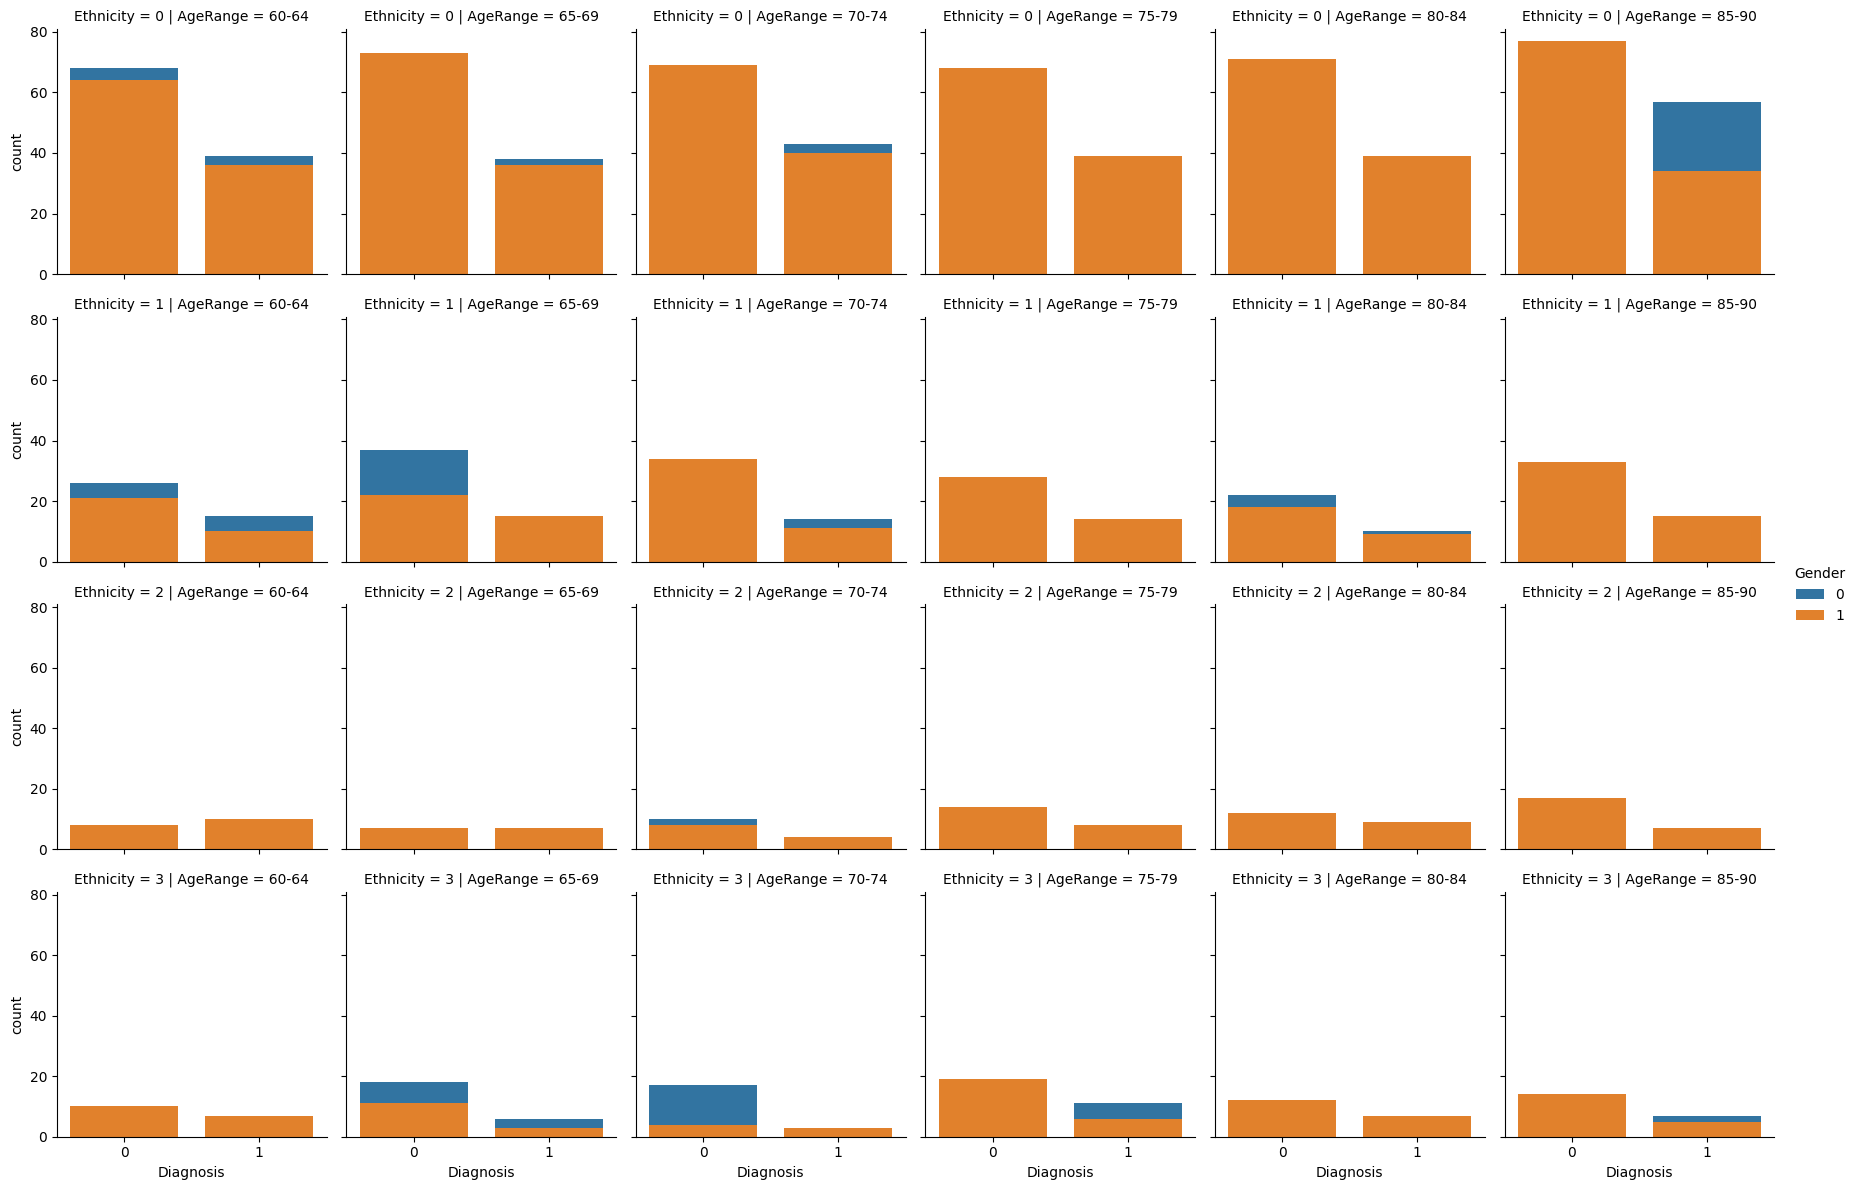

In [70]:
#Plot the facet figure with age range info combined with ethnicity
g = sns.FacetGrid(df_agerange, col="AgeRange", row="Ethnicity", hue="Gender")
g.map(sns.countplot, "Diagnosis")
g.add_legend()
plt.show()

 ## Distribution of BMI on the Diagnosed and Healthy

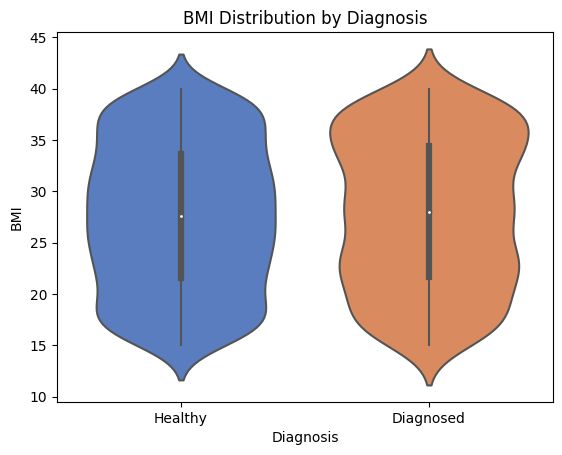

In [71]:
# Violin Plot: Comparing the distribution of BMI across different Diagnosis categories
sns.violinplot(data=df, x='Diagnosis', y='BMI', palette='muted', split=True)
plt.title('BMI Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Healthy', 'Diagnosed'])
plt.show()

## Features have slight impact on diagnosis with Alzihimer: Gender & Smoking

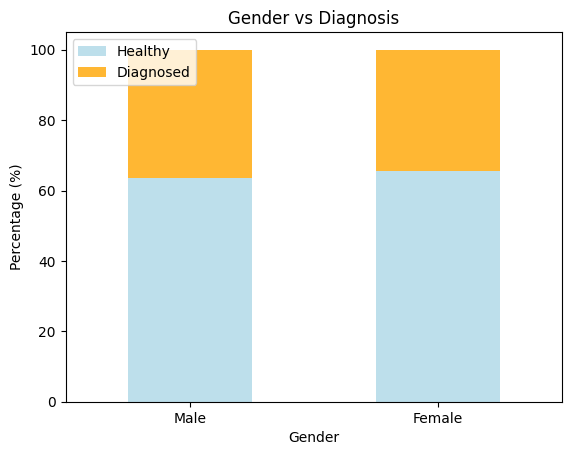

In [72]:
# Grouped Bar Plot: The effect of Gender on Diagnosis
gender_diagnosis = df.groupby(['Gender', 'Diagnosis']).size().unstack()
gender_diagnosis_norm = gender_diagnosis.div(gender_diagnosis.sum(axis=1), axis=0) * 100  # 转换为百分比
gender_diagnosis_norm.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], alpha=0.8)
plt.title('Gender vs Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(['Healthy', 'Diagnosed'], loc='upper left')
plt.show()


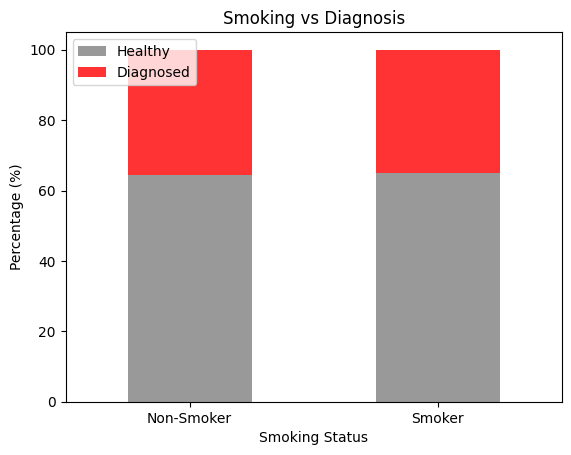

In [73]:
# Grouped Bar Plot: The effect of Smoking on Diagnosis
smoking_diagnosis = df.groupby(['Smoking', 'Diagnosis']).size().unstack()
smoking_diagnosis_norm = smoking_diagnosis.div(smoking_diagnosis.sum(axis=1), axis=0) * 100
smoking_diagnosis_norm.plot(kind='bar', stacked=True, color=['gray', 'red'], alpha=0.8)
plt.title('Smoking vs Diagnosis')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(['Healthy', 'Diagnosed'], loc='upper left')
plt.show()

## Plot and Statistics: Sleep Quality's Effect on Diagnosis

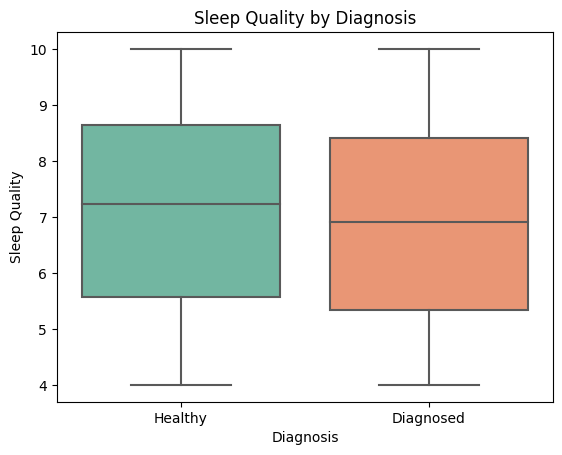

            count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                       
0          1389.0  7.124832  1.764196  4.002629  5.564564  7.238501  8.645183   
1           760.0  6.916292  1.755597  4.006171  5.340061  6.912164  8.411609   

                max  
Diagnosis            
0          9.999840  
1          9.997627  


In [74]:
# Boxplot: Relationship between Sleep Quality and Diagnosis
sns.boxplot(data=df, x='Diagnosis', y='SleepQuality', palette='Set2')
plt.title('Sleep Quality by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Sleep Quality')
plt.xticks([0, 1], ['Healthy', 'Diagnosed'])
plt.show()

# Descriptive Statistics: Mean Sleep Quality for each Diagnosis category
print(df.groupby('Diagnosis')['SleepQuality'].describe())

## Relation between Mini-Mental State Examination (MMSE) & Diagnosis

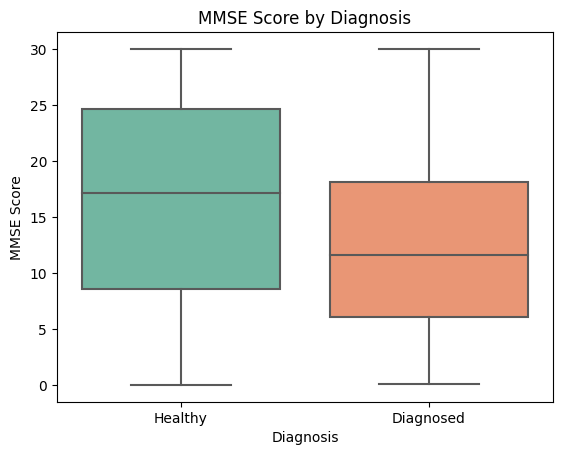

Optimization terminated successfully.
         Current function value: 0.620968
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.04419
Time:                        06:41:04   Log-Likelihood:                -1334.5
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 1.140e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.088      2.765      0.006       0.071       0.417
MMSE          -0.0600      0.

In [75]:
# Boxplot: Relationship between MMSE Score and Diagnosis
sns.boxplot(data=df, x='Diagnosis', y='MMSE', palette='Set2')
plt.title('MMSE Score by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('MMSE Score')
plt.xticks([0, 1], ['Healthy', 'Diagnosed'])
plt.show()

# Logistic regression analysis of MMSE on Diagnosis
import statsmodels.api as sm
X = sm.add_constant(df['MMSE'])
y = df['Diagnosis']
model = sm.Logit(y, X).fit()
print(model.summary())

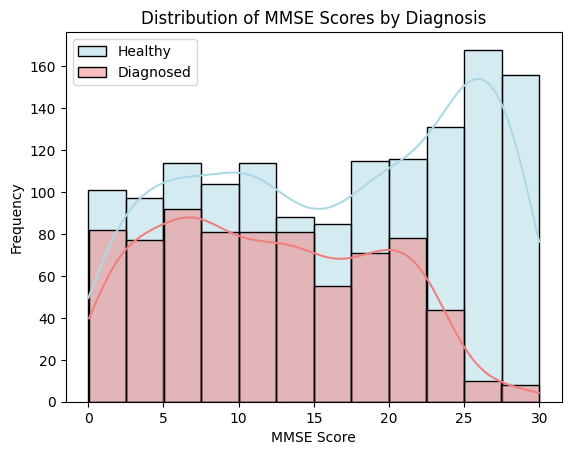

In [76]:
# Histogram of MMSE on different diagnosis result
sns.histplot(df[df['Diagnosis'] == 0]['MMSE'], color='lightblue', kde=True, label='Healthy')
sns.histplot(df[df['Diagnosis'] == 1]['MMSE'], color='lightcoral', kde=True, label='Diagnosed')
plt.title('Distribution of MMSE Scores by Diagnosis')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Analysis on Educational levels with diagnosis

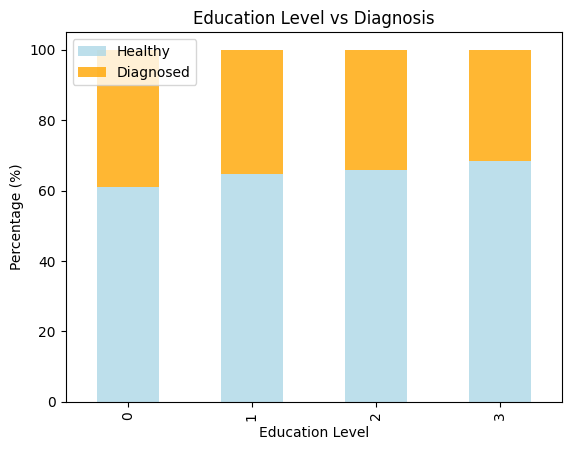

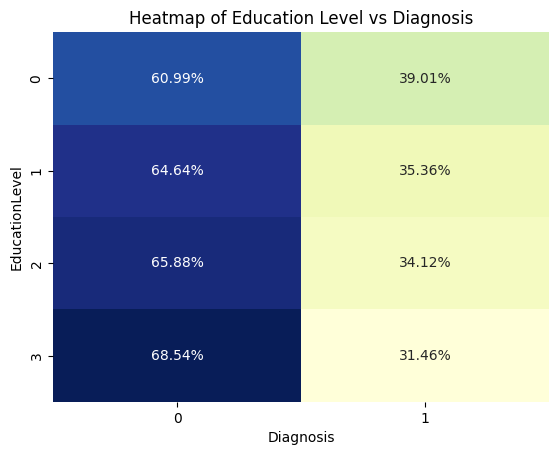

In [77]:
# Grouped Bar Plot: The effect of EducationLevel on Diagnosis
education_diagnosis = df.groupby(['EducationLevel', 'Diagnosis']).size().unstack()
education_diagnosis_norm = education_diagnosis.div(education_diagnosis.sum(axis=1), axis=0) * 100
education_diagnosis_norm.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], alpha=0.8)
plt.title('Education Level vs Diagnosis')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(['Healthy', 'Diagnosed'], loc='upper left')
plt.show()

# Heapmap between EducationLevel and Diagnosis
education_diagnosis_corr = pd.crosstab(df['EducationLevel'], df['Diagnosis']).apply(lambda r: r / r.sum(), axis=1)
sns.heatmap(education_diagnosis_corr, annot=True, cmap='YlGnBu', fmt='.2%', cbar=False)
plt.title('Heatmap of Education Level vs Diagnosis')
plt.show()

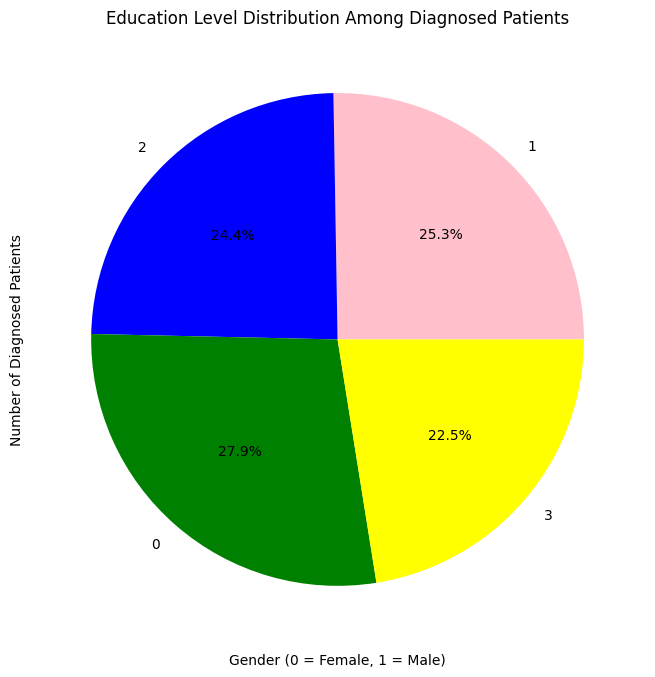

In [78]:
df_diagnosed = df[df['Diagnosis']==1]
education_total = df['EducationLevel'].value_counts()

education_diagnosed = df_diagnosed['EducationLevel'].value_counts()

education_distribution = (education_diagnosed / education_total) * 100

# Plot the pie diagram of Education Level
plt.figure(figsize=(8,8))
education_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue','green', 'yellow'])
plt.title("Education Level Distribution Among Diagnosed Patients")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Number of Diagnosed Patients")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analysis of Functional Assessment on Diagnosis

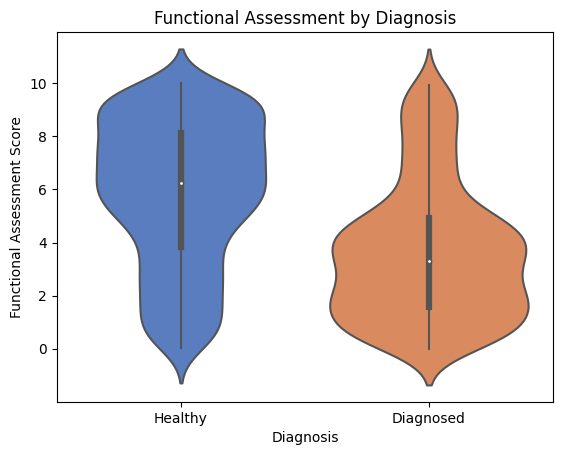

In [79]:
# Violin Plot of Functional Assessment across different Diagnosis categories
sns.violinplot(data=df, x='Diagnosis', y='FunctionalAssessment', palette='muted', split=True)
plt.title('Functional Assessment by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Functional Assessment Score')
plt.xticks([0, 1], ['Healthy', 'Diagnosed'])
plt.show()

## Analysis of Memory Complaints on Diagnosis

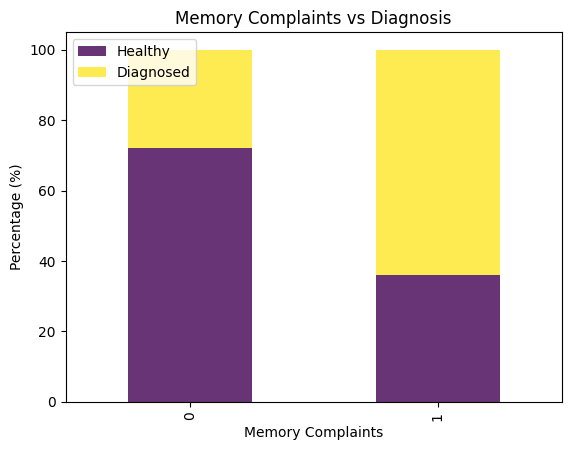

In [80]:
# Cross table Plot of Memory Complaints across different Diagnosis categories
memory_complaints_diagnosis = pd.crosstab(df['MemoryComplaints'], df['Diagnosis'], normalize='index') * 100
memory_complaints_diagnosis.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.8)
plt.title('Memory Complaints vs Diagnosis')
plt.xlabel('Memory Complaints')
plt.ylabel('Percentage (%)')
plt.legend(['Healthy', 'Diagnosed'], loc='upper left')
plt.show()

## Analysis of Behavioral Problems on Diagnosis

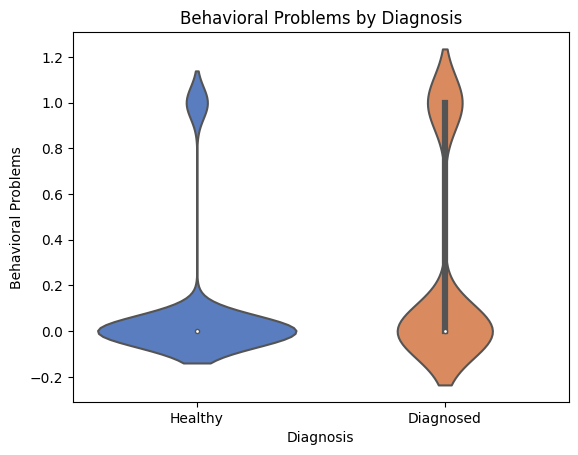

In [81]:
# Violin Plot of Behavioral Problems across different Diagnosis categories
sns.violinplot(data=df, x='Diagnosis', y='BehavioralProblems', palette='muted', split=True)
plt.title('Behavioral Problems by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Behavioral Problems')
plt.xticks([0, 1], ['Healthy', 'Diagnosed'])
plt.show()

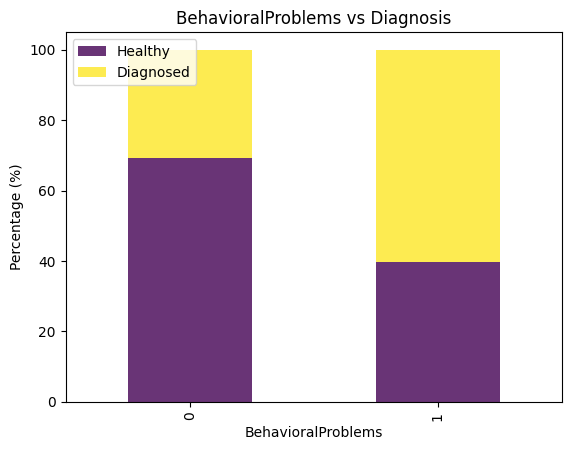

In [82]:
# Cross table Plot of Behavioral Problems across different Diagnosis categories
Behavioral_Problems_diagnosis = pd.crosstab(df['BehavioralProblems'], df['Diagnosis'], normalize='index') * 100
Behavioral_Problems_diagnosis.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.8)
plt.title('BehavioralProblems vs Diagnosis')
plt.xlabel('BehavioralProblems')
plt.ylabel('Percentage (%)')
plt.legend(['Healthy', 'Diagnosed'], loc='upper left')
plt.show()

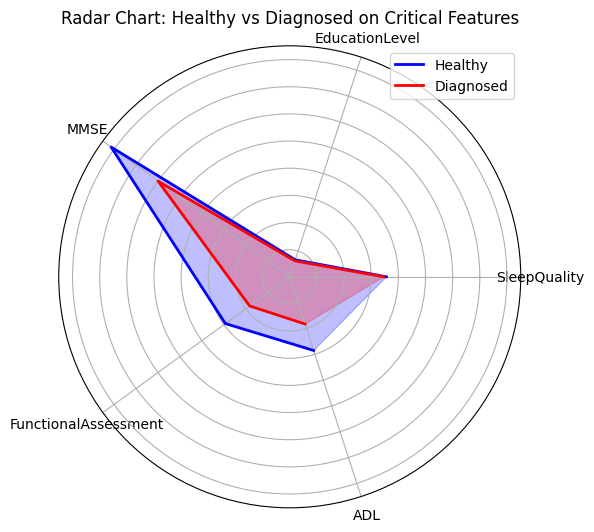

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Float critical feature that can be ploted as radar plot
label = ['SleepQuality', 'EducationLevel', 'MMSE', 'FunctionalAssessment',  'ADL']

# Means calculation
healthy_means = df[df['Diagnosis'] == 0][label].mean()
diagnosed_means = df[df['Diagnosis'] == 1][label].mean()

# angular coordination initiation
angles = np.linspace(0, 2 * np.pi, len(critical_features), endpoint=False).tolist()

healthy_values = healthy_means.tolist()
diagnosed_values = diagnosed_means.tolist()

fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

ax.plot(angles, healthy_values, color='blue', linewidth=2, label='Healthy')
ax.fill(angles, healthy_values, color='blue', alpha=0.25)

ax.plot(angles, diagnosed_values, color='red', linewidth=2, label='Diagnosed')
ax.fill(angles, diagnosed_values, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(critical_features)

plt.title('Radar Chart: Healthy vs Diagnosed on Critical Features')
plt.legend(loc='upper right')

plt.show()

# Parr III: Diagnosis Prediction

In [84]:
df_critical = df[['SleepQuality','EducationLevel','MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL']]
df_critical

,SleepQuality,EducationLevel,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
0,9.025679,2,21.463532,6.518877,0,0,1.725883
1,7.151293,0,20.613267,7.118696,0,0,2.592424
2,9.673574,1,7.356249,5.895077,0,0,7.119548
3,8.392554,1,13.991127,8.965106,0,1,6.481226
4,5.597238,0,13.517609,6.045039,0,0,0.014691
...,...,...,...,...,...,...,...
2144,7.535540,1,1.201190,0.238667,0,0,4.492838
2145,8.555256,2,6.458060,8.687480,0,1,9.204952
2146,5.769464,1,17.011003,1.972137,0,0,5.036334
2147,8.322874,1,4.030491,5.173891,0,0,3.785399


In [85]:
# Library funciton import and static functions need to calculate metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.mixture import GaussianMixture

def confusion_matrix_percentage(cm):
    return (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

def balanced_error_rate(cm):
    per_class_error = 1 - np.diag(cm) / cm.sum(axis=1)
    return np.mean(per_class_error)


In [86]:
features = df_dataonly.drop(columns=[ 'Diagnosis'])  
# features = df_critical
labels = df_dataonly['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

n_classes = len(np.unique(y_train))  
#Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model dict for iterately call
models = {
    "GMM": GaussianMixture(n_components=n_classes, covariance_type='full', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "KMeans": KMeans(n_clusters=n_classes, random_state=42),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=200),
    "SVM": SVC(kernel='linear', random_state=42)
}

confusion_matrices = {}
accuracy_scores = {}
balanced_error_rates = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for model_name, model in models.items():
    #Model train
    if model_name == "KMeans":
        model.fit(X_train)
        train_labels = model.predict(X_train)
        test_labels = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        train_labels = model.predict(X_train)
        test_labels = model.predict(X_test)

    # Metrics calculation & storage
    cm = confusion_matrix(y_test, test_labels)
    cm_percentage = confusion_matrix_percentage(cm)  
    accuracy = np.mean(test_labels == y_test)
    ber = balanced_error_rate(cm)
    precision = precision_score(y_test, test_labels, average='weighted', zero_division=0)
    recall = recall_score(y_test, test_labels, average='weighted', zero_division=0)
    f1 = f1_score(y_test, test_labels, average='weighted', zero_division=0)
    
    confusion_matrices[model_name] = cm_percentage
    accuracy_scores[model_name] = accuracy
    balanced_error_rates[model_name] = ber
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1
    
    print(f"Model：{model_name}")
    print(f"Acc：{accuracy:.2f}")
    print(f"BER：{ber:.2f}")
    print(f"Precision：{precision:.2f}")
    print(f"Recall：{recall:.2f}")
    print(f"F1-Score：{f1:.2f}")
    print("Confusion Matrix：")
    print(np.round(cm_percentage, 2))
    print("-" * 30)


print("=== Conclusion ===")
for model_name in models:
    print(f"{model_name} acc: {accuracy_scores[model_name]:.2f}")

Model：GMM
Acc：0.47
BER：0.47
Precision：0.56
Recall：0.47
F1-Score：0.45
Confusion Matrix：
[[30.42 69.58]
 [25.41 74.59]]
------------------------------
Model：KNN
Acc：0.71
BER：0.35
Precision：0.70
Recall：0.71
F1-Score：0.69
Confusion Matrix：
[[87.03 12.97]
 [56.15 43.85]]
------------------------------
Model：KMeans
Acc：0.40
BER：0.52
Precision：0.50
Recall：0.40
F1-Score：0.35
Confusion Matrix：
[[15.96 84.04]
 [19.26 80.74]]
------------------------------
Model：NaiveBayes
Acc：0.81
BER：0.22
Precision：0.81
Recall：0.81
F1-Score：0.81
Confusion Matrix：
[[88.53 11.47]
 [31.56 68.44]]
------------------------------
Model：LogisticRegression
Acc：0.82
BER：0.21
Precision：0.81
Recall：0.82
F1-Score：0.81
Confusion Matrix：
[[88.53 11.47]
 [29.92 70.08]]
------------------------------
Model：SVM
Acc：0.82
BER：0.21
Precision：0.82
Recall：0.82
F1-Score：0.81
Confusion Matrix：
[[89.03 10.97]
 [30.33 69.67]]
------------------------------
=== Conclusion ===
GMM acc: 0.47
KNN acc: 0.71
KMeans acc: 0.40
NaiveBayes acc: 0